## Logistic Regression

<h6>How to generate dataset</h6>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mu1=np.array([1,2])
mu2=np.array([6,8])

In [3]:
cov1=np.array([[0.4,0.1],[0.1,0.8]])
cov2=np.array([[1,.4],[0.4,1]])

In [4]:
X1=np.random.multivariate_normal(mu1,cov1,100)
X2=np.random.multivariate_normal(mu2,cov2,100)

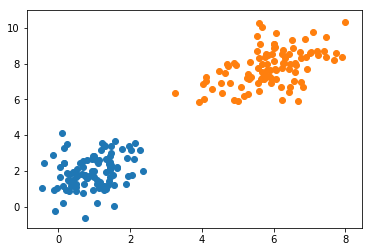

In [5]:
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])

In [6]:
y1=np.ones((100,))
y2=np.zeros((100,))

In [7]:
data=np.zeros((200,3))

In [8]:
data[:100,2].shape

(100,)

In [10]:
data[:100,:-1]=X1
data[100:,:-1]=X2
data[:100,2]=y1

In [11]:
np.random.shuffle(data)

In [12]:
X=data[:,:-1]
Y=data[:,-1]

In [13]:
X.shape,Y.shape

((200, 2), (200,))

In [14]:
data[:5]

array([[2.36641399, 2.01340507, 1.        ],
       [5.32846807, 8.08242089, 0.        ],
       [4.71954005, 7.84361367, 0.        ],
       [0.71513361, 1.7837513 , 1.        ],
       [3.24385096, 6.33505939, 0.        ]])

<h4> Logistic Regression </h4>

In [15]:
def Sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [16]:
def Hypothesis(X,theta):
    return Sigmoid(X.dot(theta))

In [17]:
def Error(X,theta,Y):
    hx=Hypothesis(X,theta)
    err=(Y*np.log(hx)+(1-Y)*np.log(1-hx)).mean()
    return -err

In [18]:
def gradient_descent(X,Y,lr=0.5,max_itr=1000):
    err_list=[]
    m,n=X.shape
    theta=np.zeros((n,1))
    for i in range(max_itr):
        err_list.append(Error(X,theta,Y))
        hx=Hypothesis(X,theta)
        grad=np.dot(X.T,(hx-Y))/m
        theta=theta-lr*grad
    return theta,err_list        

In [19]:
X=np.hstack((np.ones((X.shape[0],1)),X))

In [20]:
theta,err_list=gradient_descent(X,Y.reshape((-1,1)))

In [21]:
theta

array([[ 8.05633006],
       [-1.81467624],
       [-0.5919471 ]])

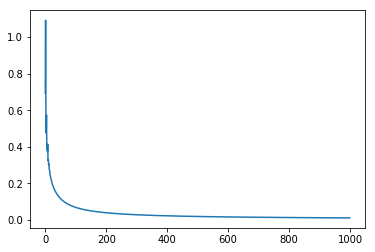

In [22]:
plt.plot(err_list)

In [23]:
x_test=np.arange(10)
x2=-(theta[0]+theta[1]*x_test)/theta[2]

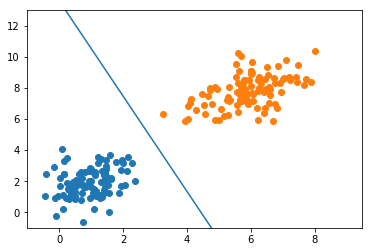

In [24]:
plt.ylim((-1,13))
plt.plot(x_test,x2)
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])

# Using SkLearn

In [2]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer=load_breast_cancer()
X=cancer.data
Y=cancer.target

In [5]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2)

In [7]:
lr=LogisticRegression()

In [8]:
lr.fit(X_train,Y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
lr.score(X_test,Y_test)

0.956140350877193

In [16]:
Y_pred=lr.predict(X_test)
(Y_pred==Y_test).mean()

0.956140350877193

In [14]:
lr.predict_proba(X_test)>.6

array([[ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [Fal

In [15]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(Y_test,Y_pred)

array([[40,  2],
       [ 3, 69]], dtype=int64)